# Basic

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 451 µs, sys: 697 µs, total: 1.15 ms
Wall time: 3.01 s


In [3]:
from dask import delayed

In [4]:
@delayed
def delayed_inc(x):
    sleep(1)
    return x + 1

@delayed
def delayed_add(x, y):
    sleep(1)
    return x + y

In [5]:
%%time
x = delayed(delayed_inc)(1)
y = delayed(delayed_inc)(2)
z = delayed(delayed_add)(x, y)

CPU times: user 116 µs, sys: 20 µs, total: 136 µs
Wall time: 130 µs


In [6]:
z

Delayed('delayed_add-0e54f9e1-941d-49e9-903f-34e96b0dba54')

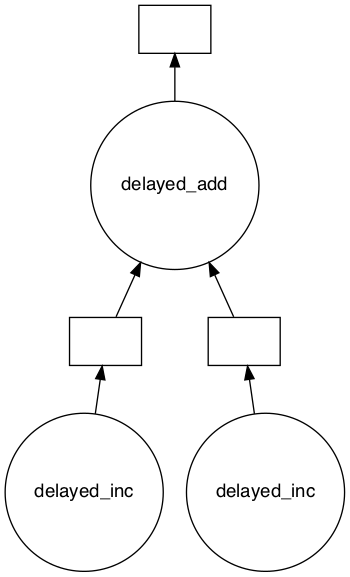

In [7]:
z.visualize()

In [8]:
%%time
z.compute()

CPU times: user 1.76 ms, sys: 1.56 ms, total: 3.32 ms
Wall time: 2.01 s


5

# For loop

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 1.19 ms, sys: 1.2 ms, total: 2.38 ms
Wall time: 8.03 s


In [11]:
%%time

results = []

for x in data:
    y = delayed(delayed_inc)(x)
    results.append(y)

total = delayed(sum)(results)

total.compute()

CPU times: user 3.28 ms, sys: 2.15 ms, total: 5.43 ms
Wall time: 1.01 s


44

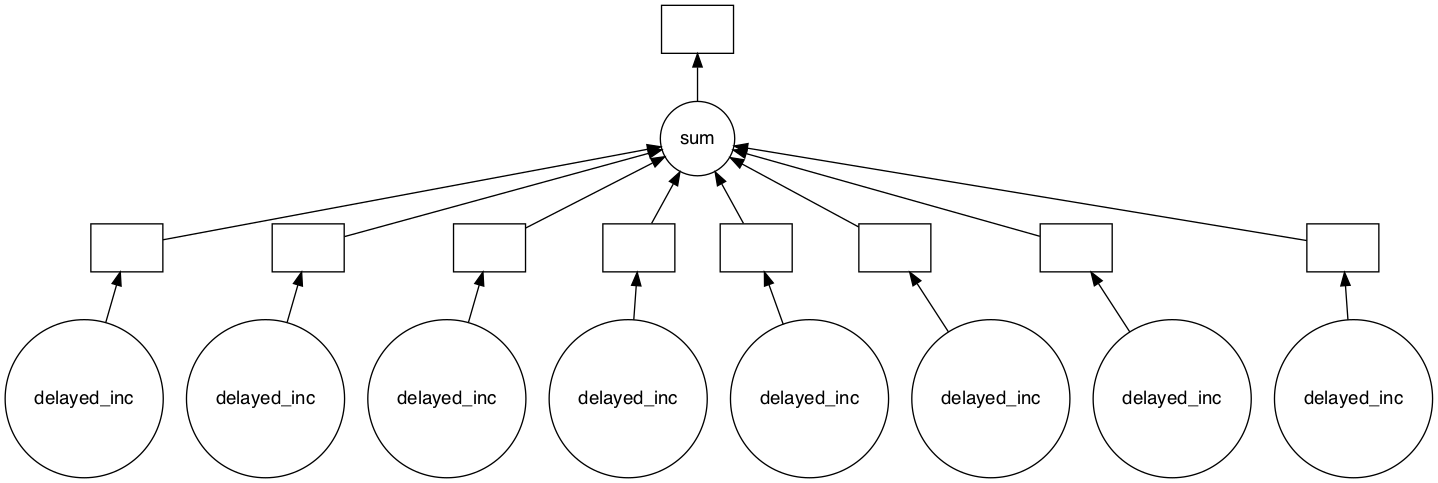

In [12]:
total.visualize()

# DataFrame

In [13]:
import urllib

print("- Downloading NYC Flights dataset... ", end='', flush=True)
url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, headers = urllib.request.urlretrieve(url, 'nycflights.tar.gz')

- Downloading NYC Flights dataset... 

In [14]:
import tarfile

with tarfile.open(filename, mode='r:gz') as flights:
    flights.extractall('data/')

In [15]:
import os
import dask.dataframe as dd

df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'), parse_dates={'Date': [0, 1, 2]})

df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [17]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [18]:
df = dd.read_csv(
    os.path.join('data', 'nycflights', '*.csv'),
    parse_dates={'Date': [0, 1, 2]},
    dtype={'TailNum': str,
    'CRSElapsedTime': float,
    'Cancelled': bool}
)

In [19]:
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [20]:
%time df.DepDelay.max().compute()

CPU times: user 3.18 s, sys: 526 ms, total: 3.71 s
Wall time: 1.61 s


1435.0

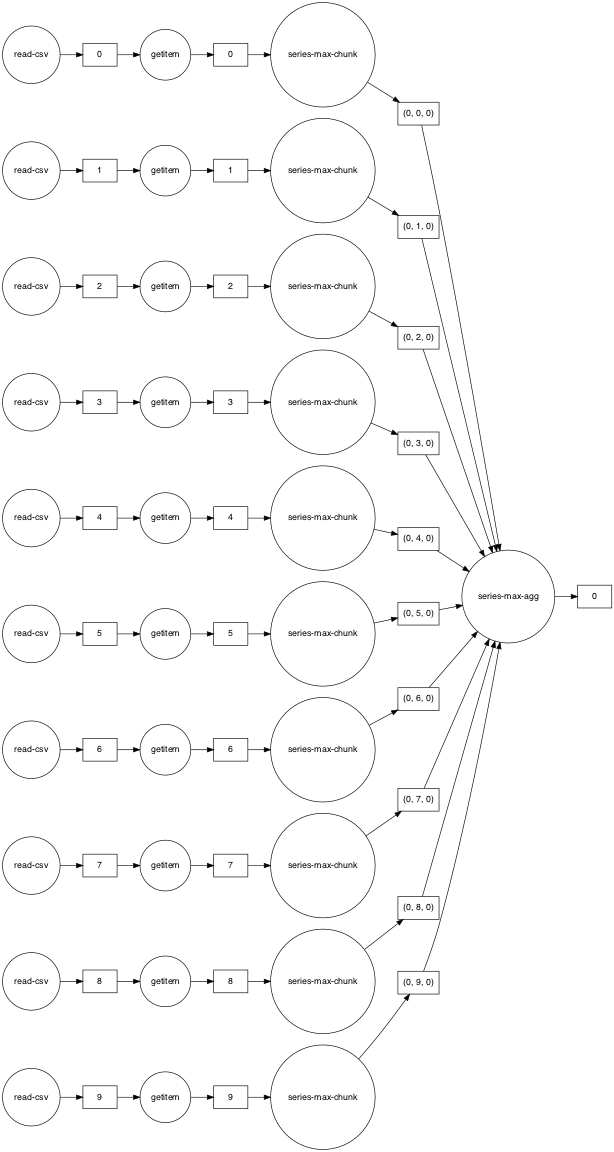

In [21]:
df.DepDelay.max().visualize(rankdir='LR', size='12, 12!')

# ML with Dask

In [22]:
df_train = df[['CRSDepTime', 'CRSArrTime', 'Cancelled']]

In [23]:
df_train.shape

(Delayed('int-94ab9ac8-9432-4a95-b40f-abdaca09c41e'), 3)

In [24]:
df_train.isnull().sum().compute()

CRSDepTime    0
CRSArrTime    0
Cancelled     0
dtype: int64

In [26]:
df_train.shape

(Delayed('int-a3162148-a093-4c78-ae44-031801d587f4'), 3)

In [55]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=df_train.shape[1]-1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd')

In [56]:
df_train.iloc[:, :-1].compute().values

array([[1540, 1701],
       [1540, 1701],
       [1540, 1701],
       ...,
       [1645, 1901],
       [1645, 1901],
       [1645, 1901]])

In [57]:
df_train.iloc[:, -1].compute().values

array([False, False, False, ..., False, False, False])

In [48]:
dataset = tf.data.Dataset.from_tensor_slices(
    (df_train.iloc[:, :-1].compute().values, df_train.iloc[:, -1].compute().values)
).batch(512)

In [58]:
model.fit(
    dataset,
    epochs=5
)

Epoch 1/5
   22/10203 [..............................] - ETA: 49s - loss: 24932.2927

2022-01-09 23:21:33.353407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10203/10203 [==============================] - 38s 4ms/step - loss: 239.6750
Epoch 2/5
10203/10203 [==============================] - 38s 4ms/step - loss: 0.1011
Epoch 3/5
10203/10203 [==============================] - 38s 4ms/step - loss: 0.1006
Epoch 4/5
10203/10203 [==============================] - 39s 4ms/step - loss: 0.1006
Epoch 5/5
10203/10203 [==============================] - 39s 4ms/step - loss: 0.1006
